In [4]:
import pandas
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [5]:
clean_dataset = pandas.read_csv('df_banco_final.csv', sep=';')

In [6]:
y = clean_dataset['default']
x = clean_dataset.drop('default', axis=1)

In [7]:
x.head()

,account_check_status,duration_in_month,credit_history,savings,present_emp_since,installment_as_income_perc,other_debtors,property,age,other_installment_plans,...,job,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito,rango_plazos_credito_2,rango_edad_2
0,1,6,5,1,1,4,1,1,67,3,...,3,1,1,0,1,5,1,2,1,5
1,2,48,3,5,3,2,1,1,22,3,...,3,0,1,1,0,1,4,6,4,1
2,4,12,5,5,2,2,1,1,49,3,...,2,0,1,0,1,3,1,3,1,3
3,1,42,3,5,2,2,3,2,45,3,...,3,0,1,0,1,3,4,8,4,3
4,1,24,4,5,3,3,1,4,53,3,...,3,0,1,0,1,4,2,5,2,4


In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [9]:
#iniciando el modelo
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [10]:
#entrenando el modelo
dtc.fit(x_train, y_train)
predictions = dtc.predict(x_test)
predictions

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [11]:
#verificando la importancia de cada atributo
dtc.feature_importances_

array([0.1793594 , 0.11360103, 0.08634993, 0.05704937, 0.04999305,
       0.03731187, 0.03250308, 0.02539327, 0.10792784, 0.0504756 ,
       0.02874671, 0.0273368 , 0.039526  , 0.02563168, 0.005503  ,
       0.00747986, 0.01535484, 0.00430029, 0.00780376, 0.0754559 ,
       0.01025849, 0.01263822])

## Evaluamos el modelo

### Matriz de confusión

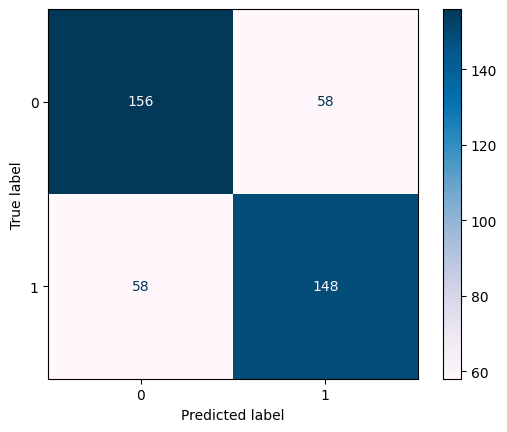

In [12]:
confmatrix = confusion_matrix(y_test, predictions)
confmatrix

visual_confmatrix = ConfusionMatrixDisplay(confmatrix)
visual_confmatrix.plot(cmap='PuBu')

In [13]:
confmatrix

array([[156,  58],
       [ 58, 148]], dtype=int64)

In [14]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
rocauc = roc_auc_score(y_test, predictions)

In [15]:
model_scores = {
  'model': 'DecisionTreeClassifier',
  'accuracy': accuracy,
  'precision': precision,
  'recall': recall,
  'f1_score': f1,
  'roc_auc_score': rocauc
}
model_scores

{'model': 'DecisionTreeClassifier',
 'accuracy': 0.7238095238095238,
 'precision': 0.7184466019417476,
 'recall': 0.7184466019417476,
 'f1_score': 0.7184466019417476,
 'roc_auc_score': 0.7237092822792851}

In [2]:
def save_scores(model_scores: dict):
  status = []
  #Utilizamos un try-except en caso de que el archivo no exista que cree uno
  try:
    #Si el archivo existe continúa por acá
    scores = pandas.read_csv('scores.csv', sep=';')
    status.append('El archivo existe')
    exist = model_scores['model'] in scores['model'].values
    #Validamos si el modelo ya existe en el archivo de scores
    if (exist):
      #Si el modelo ya existe reemplazamos sus valores
      status.append('El modelo existe')
      criteria = scores['model'] == model_scores['model']
      index = scores[criteria].index[0]
      scores.iloc[index] = model_scores
      status.append('Se reemplazaron los valores del modelo')
    else:
      #Si el modelo no existe lo agregamos
      status.append('El modelo no existe')
      df_model_scores = pandas.DataFrame(model_scores, index=[0])
      scores = pandas.concat([scores, df_model_scores], ignore_index=True)
      status.append('Se añadió modelo nuevo y sus valores')
  except:
    #Si no existe el archivo lo creamos y cargamos los scores del modelo
    status.append('El archivo no existe')
    scores = pandas.DataFrame(model_scores, index=[0])

  status.append('Se sobrescrive el archivo scores.csv con valores nuevos')
  scores.to_csv('scores.csv', sep=';', index=False)
  return status

In [16]:
save_scores(model_scores)

['El archivo existe',
 'El modelo no existe',
 'Se añadió modelo nuevo y sus valores',
 'Se sobrescrive el archivo scores.csv con valores nuevos']